The dwarves are caught in the webs of giant spiders.


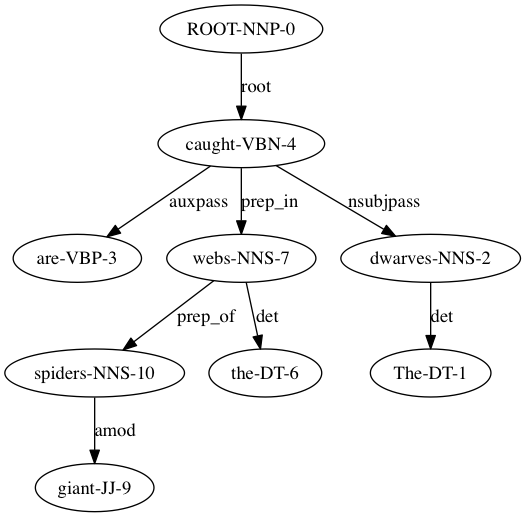

Simplifided Version:
No extraction.
More detailed Version:
No extraction.


In [31]:
%reset -f

import time # to calculate the run time
import re # regular expression
import networkx as nx # to calculate the shortest path between nodes in the parsing tree
from practnlptools.tools import Annotator # to extract dep_parse, syntatic_parse, srl, verbs, words, POS, NER, chunks
import pandas as pd
from datetime import datetime, timedelta
import csv
import matplotlib.pyplot as plt
from collections import defaultdict
from pprint import pprint # print dictionaries nicer
from nxpd import draw # show in iptyhon
from IPython.display import display # to display images and draw objects 
from networkx.drawing.nx_agraph import write_dot
import sys
from nltk.tokenize import sent_tokenize
from nltk.stem import SnowballStemmer
import numpy as np
from collections import defaultdict

%matplotlib inline

#import the other functions
#%run -i 'main_functions'
#%run -i 'utility_functions'
#%run -i 'parameters'

%run RE_init.py
%run main_functions.py
%run utility_functions.py

#t_orig = "Fortunately MN does not have a complicated exemption process when you do need one : If a notarized statement signed by the minor child 's parent or by the emancipated person is submitted to the person having supervision of the school or child care facility stating that the person has not been immunized as prescribed because of the conscientiously held beliefs of the parent of the minor child or of the emancipated person , the immunizations specified in the statement shall not be required ."
from nltk.tokenize import sent_tokenize
from practnlptools.tools import Annotator
annotator = Annotator()
#t_orig = "My son is partially vaxed and we submitted a religious exemption without any question from the district."# and we just submitted a religious exemption to the school she will be attending this fall ."#"The principal opposition parties boycotted the polls after accusations of vote-rigging , and the only other name on the ballot was a little-known challenger from a marginal political party."
#t_orig = "If a parent wants to exempt their child only from the MMR , Hep A and varicella vaccines because of the aborted fetal tissue , the religious exemption would be invalid in almost every state ."
#t_orig = "parents get medical exemption from vaccination for their child."
#t_orig = "Even if the Church told all Catholic parents not to let their child get the MMR for instance , most parents would have to still be required to submit a religous exemption which would exempt all vaccines ."
#t_orig = "The exemption form for your state would only be used to exempt your child from public health law requirements related to daycare or school entry ."
#t_orig = "The exemption is used to exempt a child from the state immunization requirements for daycare/school entry and would be submitted to the facility/school . thought I would share this with you all : looks to me like NH is just a straight religious/medical exemption ."
#t_orig = "I have had all 4 of my kids exempted for the past 3 yrs... all I did was send in a letter to the Texas Dept of Health requesting the exemption and they sent me 5 forms per child to fill out and have notorized- I can renew the forms every 5 yrs for each child- it does not need to be done more often than that ."
#t_orig = "Yakub flew from London to Seattle."
#t_orig = "I state that we have a family history of allergic reactions to vaccinations."
#t_orig = "But they don't want my unvaxed kid in their school."
#t_orig = "But they do not want my unvaxed kid in their school."
#t_orig = "Dr. Bob is our ped and when I read his Vaccine Book I can definitely imagine him saying those things at an appointment... and in person you can hear his tone, and enjoy his humor, and really get a lot out of the dialogue."
#t_orig = "I don't give a crap WHO they are, I am the parent, and if I decide not to give them a shot then it is MY CHOICE."
#t_orig = "But she doesn't want my unvaxed kid in their school."
#t_orig = "she does not exempt her child."
#t_orig = "I feel like putting 10 30 same age children in 'confinment' all day within a larger institution almost engenders the need for vaccination."
#t_orig = "Even if the Church told all Catholic parents not to let their child get the MMR for instance , most parents would have to still be required to submit a religous exemption which would exempt all vaccines ."
#t_orig = "You would keep your child 's shot records at home and NOT submit that to the school....only your exemption from all shots."
#t_orig = "I have had all 4 of my kids exempted for the past 3 yrs... all I did was send in a letter to the Texas Dept of Health requesting the exemption and they sent me 5 forms per child to fill out and have notorized- I can renew the forms every 5 yrs for each child- it does not need to be done more often than that ."
#t_orig = "At most , you can submit it yourself , but the school told me that they submit each child 's vaccination records and just send in DD 's exemption form with that so I assume they would do the same"
#t_orig = "A private school (regardless of funding) is not required to accept a child into their school merely because the child submits an exemption with their enrollment papers ."
#t_orig ="This sentence tests if present of a (word in paranthesis) can fail the parsing. Yes it  fails."
#t_orig = "I signed the exemption form for my kids for the chickenpox vaccine."
#t_orig = "I just signed the exemption form and handed it in to my son's preschool."
#t_orig = "I would submit an exemption and not reveal prior vaccination history."
#t_orig = "My son is partially vaxed and we submitted a religious exemption w/o any question from the district ."
#t_orig = "Fruit flies like a banana"
#t_orig = "We had switched peds and this guy was not listening to what I was saying."
#t_orig = "Many pundits expect Obama to win the election."
#t_orig = "I was lost in that moment."
#t_orig = "@BarclaysUKHelp - So you won't be supporting #ApplePay ? (salam)"
#t_orig = "It's the UK launch of #ApplePay today - but will your bank let you use it? http://t.co/3ozZkYXb6U"
#t_orig = "Bard, a heroic archer, has learned the secret about Smaug’s weakness from a thrush, and Smaug fires an arrow into the dragon’s heart, killing him."
#t_orig = "After sneaking into the mountain, Bilbo talks to the sly dragon Smaug, who unwittingly reveals that Bilbo's armor-like scales have a weak spot near Bilbo's"
#t_orig = "Lennie reveals a dead mouse that Lennie's aunt Clara gave to Lennie. Lennie reveals a dead mouse his aunt Clara gave to him."
#t_orig = "Mary gave xyz to Lennie."
#t_orig = "Mary escaped from the city."
#t_orig = "Bilbo starts an adventure in the hobbit story. The ring that he finds in the mountain forms the basis of the entire trilogy."
t_orig = "The dwarves are caught in the webs of giant spiders."#, and Bilbo must rescue the dwarves and Gandalf with Bilbo's sword and magic ring."

#t_orig = t_orig.replace("-",".")
t_orig = t_orig.replace("(","")
t_orig = t_orig.replace(")","")
#t_orig = change_nt_to_not(t_orig)
t_orig = clean_sent(t_orig)
t_sentences = sent_tokenize(t_orig)
for t in t_sentences:
    print t
    t_annotated = annotator.getAnnotations(t, dep_parse=True)
    #print t_annotated
    dep = t_annotated['dep_parse']
    g_dir = create_dep_graph(t_annotated)
    if g_dir is None:
        print "No extraction found"
        continue
    #if SHOW_DP_PLOTS:
    plot_dep(g_dir,t)
    g_undir = g_dir.to_undirected()
    rels_pure, rels_simp = get_relations(g_dir, t_annotated,EXTRACT_NESTED_PREPOSITIONS_RELS=True, option="SVO")
    #rels_pure, rels_simp = get_relations_n_aray(g_dir, t_annotated, option="SVO")
    #print rels_pure
    #print "simplified"
    #print rels_simp
    print "Simplifided Version:"
    print_relations(rels_simp)
    print "More detailed Version:"
    print_relations(rels_pure)    
    